In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/_path.so, 2): no suitable image found.  Did find:
	/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/_path.so: no matching architecture in universal wrapper

In [130]:
trainfile = "train.csv"
testfile = "test.csv"

data = pd.read_csv(trainfile, nrows=100000)
names = data['smiles']
data = data.drop('smiles',1)
train = data[:50000]
valid = data[50001:]

In [131]:
ytrain = train['gap']
xtrain = train.drop('gap',1)
yvalid = valid['gap']
xvalid = valid.drop('gap',1)


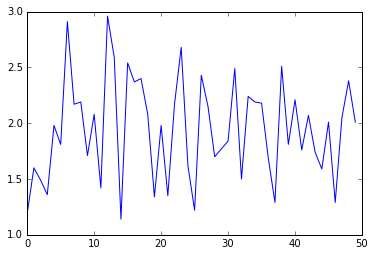

In [75]:
plt.plot(range(0,50),ytrain)

In [56]:
ridreg = linear_model.Ridge()
ridreg.fit(xtrain,ytrain)
theta_rr = ridreg.coef_

In [87]:
y_hat = np.dot(xtrain,theta_rr)
diff = (y_hat - ytrain)
diff_t = (y_hat - ytrain).transpose()
loss_rr = np.dot(diff_t,diff)/2

In [86]:
loss

182.93752054212533

In [88]:
brid = linear_model.BayesianRidge()
brid.fit(xtrain,ytrain)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [97]:
w_br = brid.coef_
y_br = np.dot(xtrain,w_br)
loss = np.dot((y_br-ytrain).transpose(),(y_br-ytrain))/2

In [98]:
loss

168.17431894596635

In [132]:
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
loss_gb = mean_squared_error(ytrain,gb.predict(xtrain))
loss_gb
error = mean_squared_error(yvalid,gb.predict(xvalid))
error

0.081797301438019832

In [138]:
xtrain.shape[0]

50000